# Diabetes Risk Factor Analysis Dashboard 🏥📊

**Author:** Rafhiromadoni Sopandi | **Role:** Data Analyst / Healthcare Analyst
**Tech Stack:** Python, Pandas, Plotly Interactive

## 📌 Executive Summary
Diabetes adalah salah satu penyakit kronis dengan prevalensi tinggi global. Analisis ini bertujuan untuk mengidentifikasi **Faktor Risiko Utama** yang berkontribusi terhadap diagnosis diabetes pada pasien perempuan (Dataset Pima Indians).

Dashboard ini dirancang untuk menjawab:
1.  **Risk Profiling:** Bagaimana profil pasien yang berisiko tinggi?
2.  **Key Indicators:** Apakah Glukosa dan BMI adalah indikator mutlak?
3.  **Actionable Insight:** Rekomendasi screening untuk penyedia layanan kesehatan.

In [1]:
from google.colab import files
# Upload file diabetes.csv
uploaded = files.upload()


Saving diabetes_dataset.csv to diabetes_dataset.csv


In [3]:


# Baca file yang di-upload
df = pd.read_csv("diabetes_dataset.csv")

# Tampilkan 5 baris pertama
df.head()


,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


✅ Dataset Diabetes Berhasil Dimuat!
Total Pasien: 100,000 jiwa
Kolom yang tersedia: year, gender, age, location, race:AfricanAmerican, race:Asian, race:Caucasian, race:Hispanic, race:Other, hypertension, heart_disease, smoking_history, bmi, hbA1c_level, blood_glucose_level, diabetes, Diabetes_Label
--------------------------------------------------

📊 Grafik 1: Korelasi HbA1c dan Glukosa terhadap Risiko Diabetes


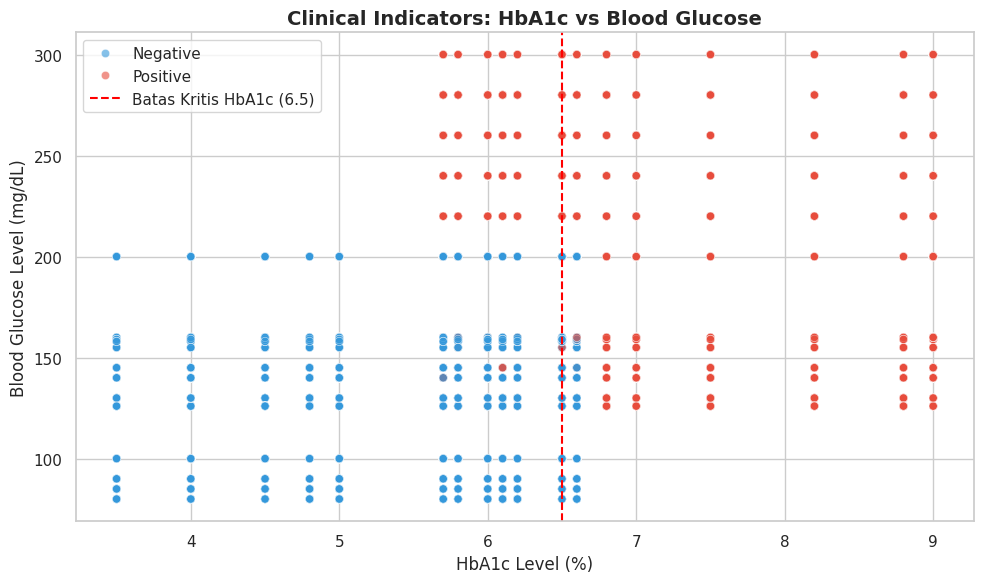


📊 Grafik 2: Distribusi BMI Berdasarkan Status Diabetes


/tmp/ipython-input-313338798.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Diabetes_Label', y='bmi', palette={'Negative': '#3498db', 'Positive': '#e74c3c'})


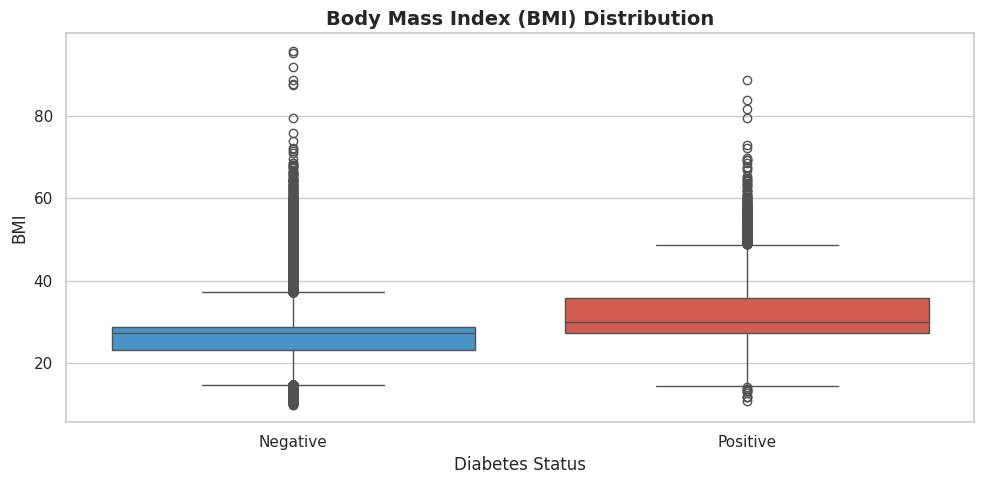


📌 INSIGHT STATIS:
- Dari data asli, terlihat sangat jelas bahwa pasien dengan HbA1c di atas 6.5 dan Glukosa di atas 150 sangat rentan terhadap diabetes.
- Pasien yang positif diabetes juga memiliki rata-rata BMI yang sedikit lebih tinggi (cenderung obesitas).


In [5]:
# ---SETUP & STATIC ANALYSIS (REAL DATASET) ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. LOAD DATASET ASLI
# Membaca dataset langsung dari file CSV Anda
df = pd.read_csv('diabetes_dataset.csv')

# Membuat label teks agar visualisasi lebih mudah dibaca
df['Diabetes_Label'] = df['diabetes'].map({0: 'Negative', 1: 'Positive'})

print("✅ Dataset Diabetes Berhasil Dimuat!")
print(f"Total Pasien: {len(df):,} jiwa")
print(f"Kolom yang tersedia: {', '.join(df.columns)}")
print("-" * 50)

# 2. VISUALISASI STATIS (Aman untuk dirender di GitHub)
sns.set_theme(style="whitegrid")

# Grafik 1: Scatter Plot HbA1c vs Glucose
print("\n📊 Grafik 1: Korelasi HbA1c dan Glukosa terhadap Risiko Diabetes")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='hbA1c_level', y='blood_glucose_level', hue='Diabetes_Label',
                palette={'Negative': '#3498db', 'Positive': '#e74c3c'}, alpha=0.6)
plt.title('Clinical Indicators: HbA1c vs Blood Glucose', fontsize=14, fontweight='bold')
plt.xlabel('HbA1c Level (%)')
plt.ylabel('Blood Glucose Level (mg/dL)')
plt.axvline(x=6.5, color='red', linestyle='--', label='Batas Kritis HbA1c (6.5)')
plt.legend()
plt.tight_layout()
plt.show()

# Grafik 2: Distribusi BMI
print("\n📊 Grafik 2: Distribusi BMI Berdasarkan Status Diabetes")
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Diabetes_Label', y='bmi', palette={'Negative': '#3498db', 'Positive': '#e74c3c'})
plt.title('Body Mass Index (BMI) Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

# Insight Singkat
print("\n📌 INSIGHT STATIS:")
print("- Dari data asli, terlihat sangat jelas bahwa pasien dengan HbA1c di atas 6.5 dan Glukosa di atas 150 sangat rentan terhadap diabetes.")
print("- Pasien yang positif diabetes juga memiliki rata-rata BMI yang sedikit lebih tinggi (cenderung obesitas).")

In [6]:
# ---ADVANCED INTERACTIVE DASHBOARD (REAL DATA) ---
import gradio as gr
import plotly.express as px
import pandas as pd

# Load ulang data untuk memastikan aman di fungsi Gradio
df = pd.read_csv('diabetes_dataset.csv')
df['Diabetes_Label'] = df['diabetes'].map({0: 'Negative', 1: 'Positive'})

def update_dashboard(age_start, age_end, selected_smoking, selected_gender):
    # 1. Filter Data (Aman & Anti-Error)
    if age_start > age_end:
        age_start, age_end = age_end, age_start

    if not selected_smoking:
        selected_smoking = df['smoking_history'].unique().tolist()

    if not selected_gender:
        selected_gender = df['gender'].unique().tolist()

    filtered_df = df[(df['age'] >= age_start) &
                     (df['age'] <= age_end) &
                     (df['smoking_history'].isin(selected_smoking)) &
                     (df['gender'].isin(selected_gender))]

    # Handle jika data kosong setelah difilter
    if filtered_df.empty:
        empty_fig = px.scatter(title="⚠️ Tidak ada data pasien dengan kriteria ini.")
        return empty_fig, empty_fig, empty_fig, "### ⚠️ Data Kosong. Silakan ubah filter."

    # 2. GRAFIK 1: SCATTER PLOT INTERAKTIF
    fig_scatter = px.scatter(filtered_df, x='hbA1c_level', y='blood_glucose_level',
                             color='Diabetes_Label', size='bmi', hover_data=['age', 'gender'],
                             color_discrete_map={'Negative': '#636EFA', 'Positive': '#EF553B'},
                             title=f"🩺 Indikator Klinis (Usia {age_start} - {age_end})",
                             template="plotly_white")
    fig_scatter.add_vline(x=6.5, line_dash="dash", line_color="red", annotation_text="Batas HbA1c")

    # 3. GRAFIK 2: PIE CHART (Rasio Diabetes)
    diabetes_counts = filtered_df['Diabetes_Label'].value_counts().reset_index()
    diabetes_counts.columns = ['Status', 'Count']
    fig_pie = px.pie(diabetes_counts, values='Count', names='Status',
                     color='Status', color_discrete_map={'Negative': '#636EFA', 'Positive': '#EF553B'},
                     title="📊 Rasio Positif vs Negatif", hole=0.4, template="plotly_white")

    # 4. GRAFIK 3: HISTOGRAM (Distribusi BMI)
    fig_hist = px.histogram(filtered_df, x='bmi', color='Diabetes_Label',
                            barmode='overlay', title="👥 Distribusi Obesitas (BMI)",
                            color_discrete_map={'Negative': '#636EFA', 'Positive': '#EF553B'},
                            template="plotly_white")

    # 5. RINGKASAN EKSEKUTIF
    total_patients = len(filtered_df)
    positive_cases = len(filtered_df[filtered_df['diabetes'] == 1])
    prevalence = (positive_cases / total_patients) * 100 if total_patients > 0 else 0

    summary = f"""
    ### 📋 Executive Summary
    * **Populasi Terfilter:** **{total_patients:,}** pasien
    * **Kasus Positif:** **{positive_cases:,}** pasien
    * **Prevalensi Risiko:** **{prevalence:.1f}%**
    """

    return fig_scatter, fig_pie, fig_hist, summary

# --- UI GRADIO ---
with gr.Blocks(title="Diabetes Risk Dashboard") as app:
    gr.Markdown("# 🩸 Advanced Diabetes Risk Analytics")
    gr.Markdown("Eksplorasi profil pasien menggunakan dataset riil untuk mengidentifikasi korelasi medis.")

    with gr.Row():
        with gr.Column(scale=2):
            in_smoking = gr.Dropdown(choices=df['smoking_history'].unique().tolist(),
                                     value=['never', 'current', 'former'],
                                     multiselect=True, label="Riwayat Merokok")
            in_gender = gr.Dropdown(choices=df['gender'].unique().tolist(),
                                    value=df['gender'].unique().tolist(),
                                    multiselect=True, label="Gender")
        with gr.Column(scale=2):
            with gr.Row():
                in_age_start = gr.Slider(0, 100, value=20, step=1, label="Umur (Min)")
                in_age_end = gr.Slider(0, 100, value=80, step=1, label="Umur (Max)")
        with gr.Column(scale=1):
            btn = gr.Button("🔄 Analisis Data", variant="primary")

    with gr.Row():
        out_summary = gr.Markdown()

    with gr.Row():
        out_scatter = gr.Plot()

    with gr.Row():
        out_pie = gr.Plot()
        out_hist = gr.Plot()

    btn.click(update_dashboard, inputs=[in_age_start, in_age_end, in_smoking, in_gender], outputs=[out_scatter, out_pie, out_hist, out_summary])
    app.load(update_dashboard, inputs=[in_age_start, in_age_end, in_smoking, in_gender], outputs=[out_scatter, out_pie, out_hist, out_summary])

app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://696878e0f6fa14303e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## 💡 Key Insights & Recommendations

Berdasarkan analisis visual interaktif pada dataset ini:

1.  **The HbA1c Factor:** Selain glukosa sesaat (*blood glucose*), terlihat pemisahan yang sangat tegas pada level **HbA1c**. Pasien dengan HbA1c > 6.5 hampir dipastikan positif diabetes. Ini indikator screening yang lebih baik daripada glukosa biasa.
2.  **Komorbiditas:** Dataset ini menunjukkan korelasi antara BMI tinggi dan diabetes. Faktor usia (*size bubble* pada scatter plot) juga memperbesar risiko.
3.  **Rekomendasi Bisnis/Klinis:**
    * **Screening Prioritas:** Fokuskan tes HbA1c pada individu dengan BMI > 30 dan usia > 45 tahun.
    * **Lifestyle Intervention:** Mengingat data *smoking_history* tersedia, program berhenti merokok bisa disarankan sebagai bagian dari pencegahan komplikasi jantung (*heart_disease*) pada pasien diabetes.

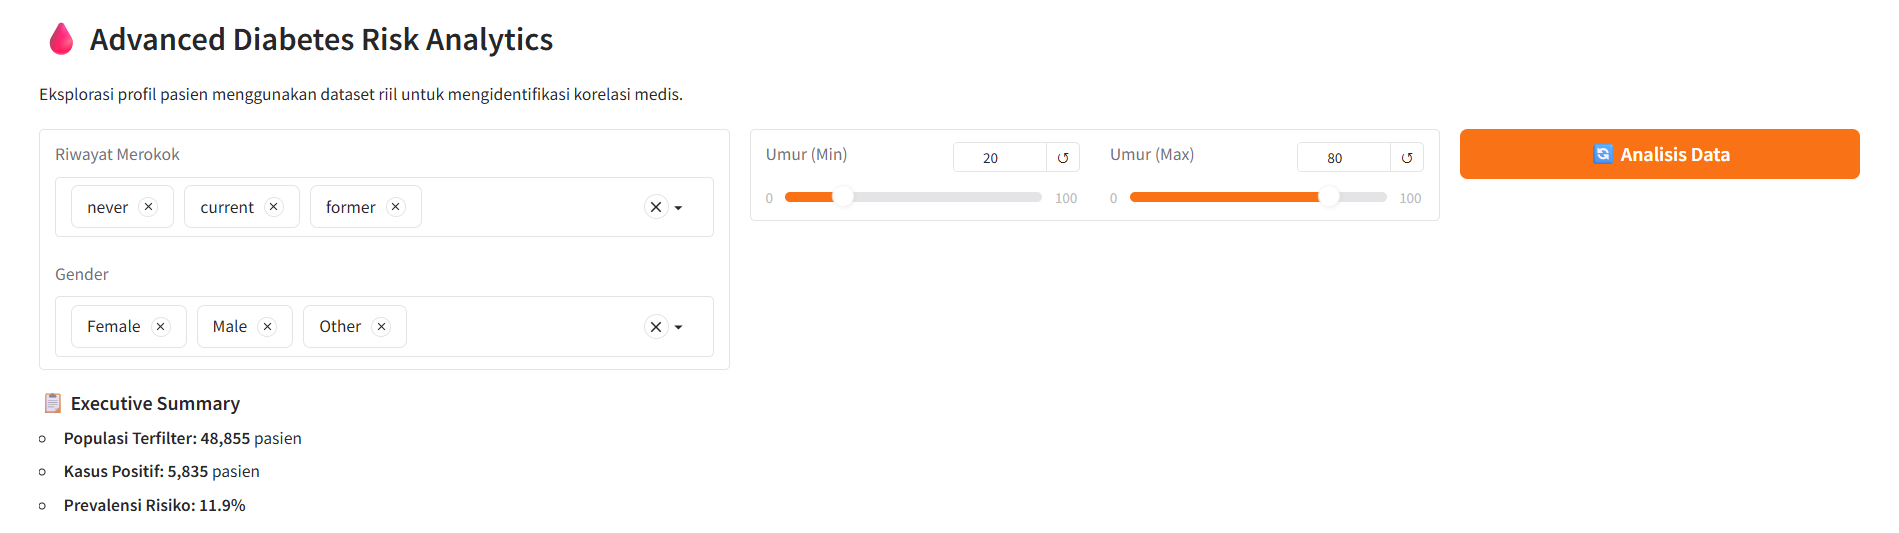

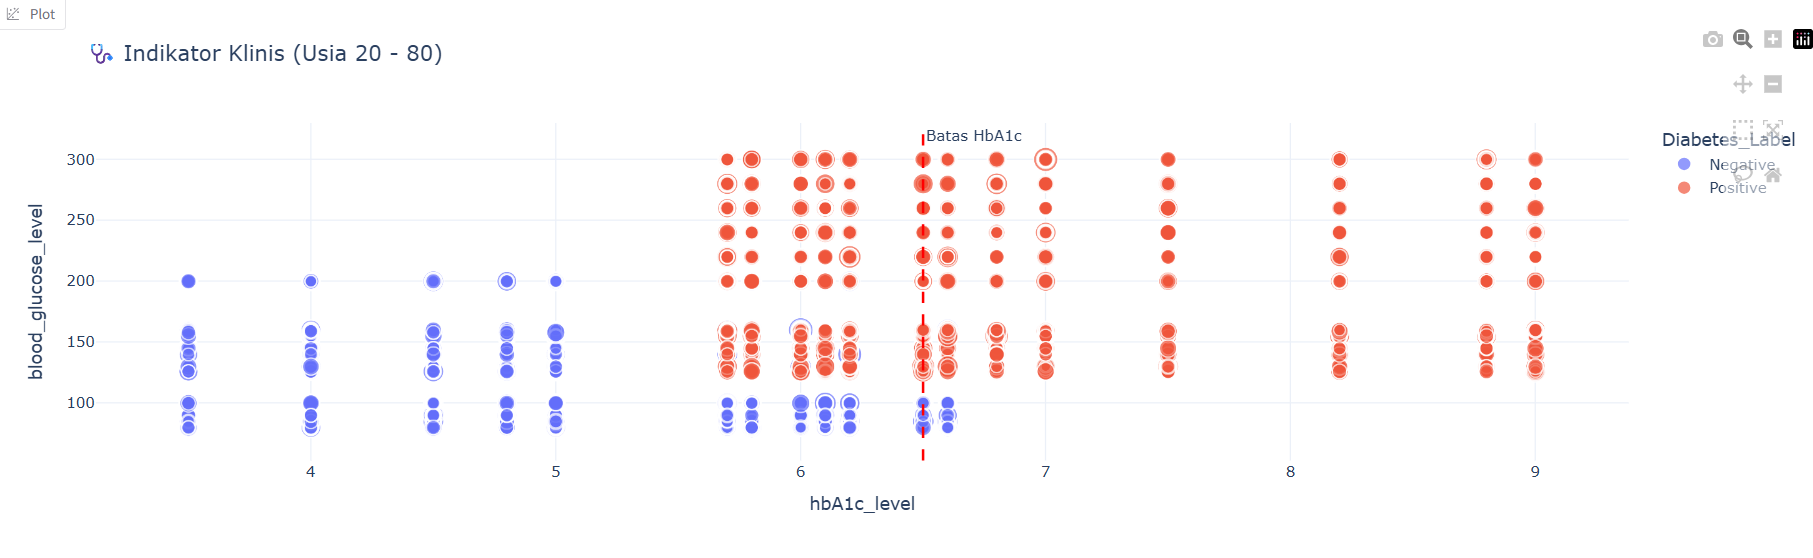

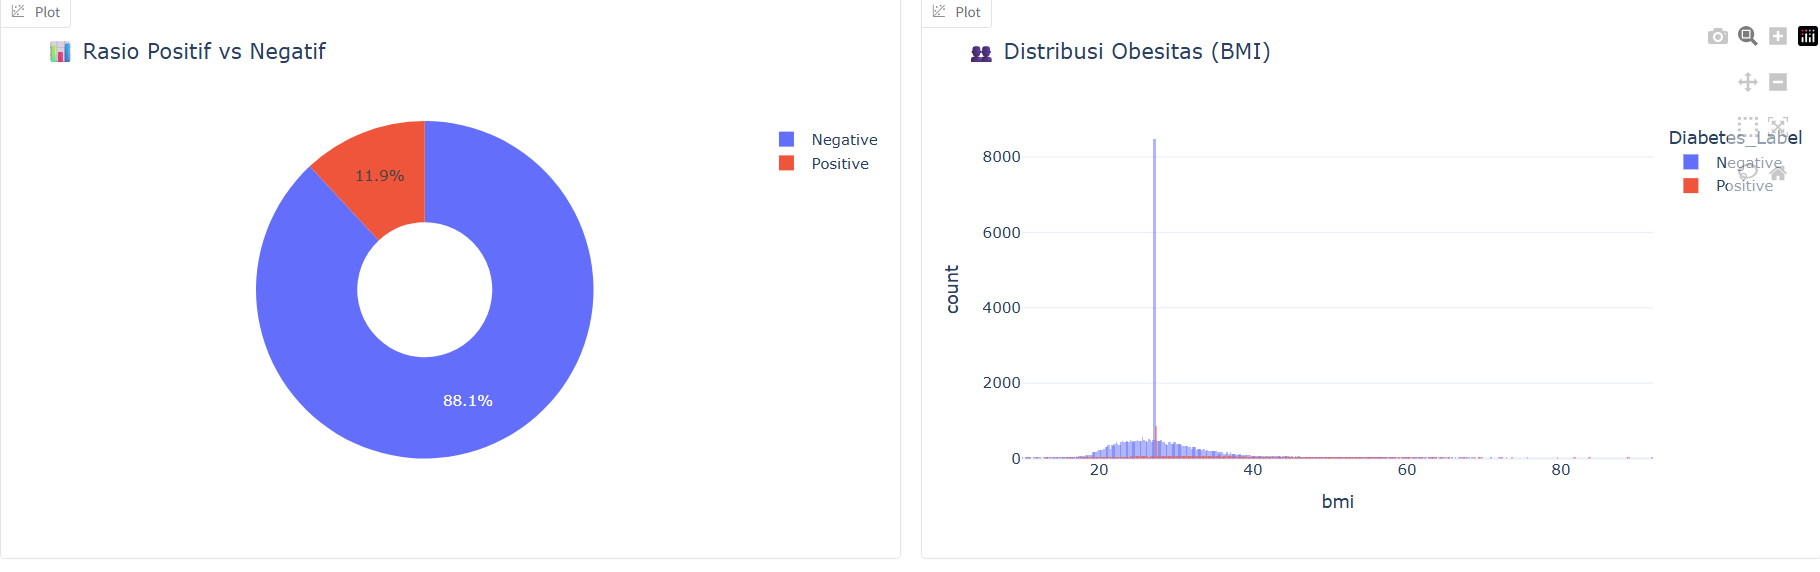